In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
%cd D:\Documents\DREAM\Portfolio\Data

D:\Documents\DREAM\Portfolio\Data


### Import Dataset

In [3]:
# We create a dictionnary where we'll store our 5 DataFrames, imported from data files
dict_data = {}

# for each year of study, store data as DataFrame in the dict
for year in range(2015, 2020):
    df = pd.read_csv('world happiness ' + str(year) + '.csv')
    dict_data[year] = df
dict_data

{2015:          Country                           Region  Happiness Rank  \
 0    Switzerland                   Western Europe               1   
 1        Iceland                   Western Europe               2   
 2        Denmark                   Western Europe               3   
 3         Norway                   Western Europe               4   
 4         Canada                    North America               5   
 ..           ...                              ...             ...   
 153       Rwanda               Sub-Saharan Africa             154   
 154        Benin               Sub-Saharan Africa             155   
 155        Syria  Middle East and Northern Africa             156   
 156      Burundi               Sub-Saharan Africa             157   
 157         Togo               Sub-Saharan Africa             158   
 
      Happiness Score  Standard Error  Economy (GDP per Capita)   Family  \
 0              7.587         0.03411                   1.39651  1.34951   


# Cleaning Process

In [4]:
#Let's have a quick overview of rows and columns for each file

# We create a DataFrame where we'll store row and col numbers for each year of study
df_dim = pd.DataFrame(['row', 'col'])

# for each year, store row and col numbers in the DataFrame
for year in range(2015, 2020):
    df_dim = pd.concat([df_dim, pd.DataFrame(dict_data[year].shape, columns=[str(year)])], axis = 1)

#set index
df_dim.set_index(0, inplace=True)
df_dim.index.name = None
df_dim

,2015,2016,2017,2018,2019
row,158,157,155,156,156
col,12,13,12,9,9


As we can see, datasets differs in rows and columns. Thus, we now have to investigate and find a common structure to gather them.

### Columns Comparison

In [5]:
# We create a DataFrame to store the columns lists for each set.
df_col = pd.DataFrame()
for year in range(2015, 2020):
    df_col = pd.concat([df_col, pd.DataFrame(dict_data[year].columns.tolist(), columns=[str(year)])], axis = 1)
df_col

,2015,2016,2017,2018,2019
0,Country,Country,Country,Overall rank,Overall rank
1,Region,Region,Happiness.Rank,Country or region,Country or region
2,Happiness Rank,Happiness Rank,Happiness.Score,Score,Score
3,Happiness Score,Happiness Score,Whisker.high,GDP per capita,GDP per capita
4,Standard Error,Lower Confidence Interval,Whisker.low,Social support,Social support
5,Economy (GDP per Capita),Upper Confidence Interval,Economy..GDP.per.Capita.,Healthy life expectancy,Healthy life expectancy
6,Family,Economy (GDP per Capita),Family,Freedom to make life choices,Freedom to make life choices
7,Health (Life Expectancy),Family,Health..Life.Expectancy.,Generosity,Generosity
8,Freedom,Health (Life Expectancy),Freedom,Perceptions of corruption,Perceptions of corruption
9,Trust (Government Corruption),Freedom,Generosity,NaN,NaN


Looking at this output, we can easily notice 3 different cases:
1. List which use in every study:
- Happiness Rank/Happiness.Rank/Overall rank
- Hapiness Score/Happiness.Score/Score
- Economy(GDP per Capita)/Economy.GDP.per.Capita/GDP per capita
- Health (Life Expectancy)/Health..Life.Expectancy/Healthy life expectancy
- Freedom/Freedom to make life choices
- Generosity
2. List which seem to be the same but need a deeper examination
- Country + Region / Country / Country or region
- Trust (Government Corruption) / Trust..Government.Corruption. / Perceptions of corruption
- Family / Social Support
3. List that are not contained in all the data files
- 2015 : Standard error
- 2016 : Lower Confidence Interval + Upper Confidence Interval
- 2017 : Whisker.high + Whisker.low
- 2015, 2016, 2017: Dystopia Residual / Dystopia.Residual

##### Feature that are not contained in all the data files

##### Feature which use in every study

In [6]:
#Since we will analyze happiness through time, we remove the list that are not contained in all the data files
dict_data[2015] = dict_data[2015].drop(columns=['Standard Error','Dystopia Residual'])
dict_data[2016] = dict_data[2016].drop(columns=['Lower Confidence Interval', 'Upper Confidence Interval','Dystopia Residual'])
dict_data[2017] = dict_data[2017].drop(columns=['Dystopia.Residual','Whisker.high','Whisker.low'])

In [7]:
#Rename the list which use in every study
dict_data[2015].rename(columns={'Happiness Rank':'Overall rank', 'Happiness Score':'Score', 'Economy (GDP per Capita)':'GDP per capita',
'Health (Life Expectancy)':'Healthy life expectancy'}, inplace = True)
dict_data[2016].rename(columns={'Happiness Rank':'Overall rank','Happiness Score':'Score','Economy (GDP per Capita)':'GDP per capita',
'Health (Life Expectancy)':'Healthy life expectancy'}, inplace = True)
dict_data[2017].rename(columns={'Happiness.Rank':'Overall rank','Happiness.Score':'Score','Economy..GDP.per.Capita.':'GDP per capita',
'Health..Life.Expectancy.':'Healthy life expectancy'}, inplace = True)
dict_data[2018].rename(columns={'Freedom to make life choices':'Freedom'}, inplace = True)
dict_data[2019].rename(columns={'Freedom to make life choices':'Freedom'}, inplace = True)

##### Feature which seem to be the same but need more explanation

In [8]:
#Country + Region / Country / Country or region
#Let see the values of each feature
dict_data[2015]['Country'].count()
dict_data[2016]['Country'].count()
dict_data[2017]['Country'].count()
dict_data[2018]['Country or region'].count()
dict_data[2019]['Country or region'].count()

countries = {}
countries[2015] = dict_data[2015]['Country'].tolist()
countries[2016] = dict_data[2016]['Country'].tolist()
countries[2017] = dict_data[2017]['Country'].tolist()
countries[2018] = dict_data[2018]['Country or region'].tolist()
countries[2019] = dict_data[2019]['Country or region'].tolist()
inter = set(countries[2015]).intersection(countries[2016], countries[2017], countries[2018], countries[2019])
len(inter)

141

Since the feature contains between 155 and 158 rows and the number of the intersection is 144 rows, we assume that this features have the same information

In [9]:
#Rename the feature with Country
dict_data[2018].rename(columns={'Country or region':'Country'}, inplace = True)
dict_data[2019].rename(columns={'Country or region':'Country'}, inplace = True)

In [10]:
#Trust (Government Corruption) / Trust..Government.Corruption. / Perceptions of corruption
#First we check the null values
dict_data[2015]['Trust (Government Corruption)'].isna().sum()
dict_data[2016]['Trust (Government Corruption)'].isna().sum()
dict_data[2017]['Trust..Government.Corruption.'].isna().sum() 
dict_data[2018]['Perceptions of corruption'].isna().sum()
dict_data[2019]['Perceptions of corruption'].isna().sum()
#Since there is a missing value in 2018, we fill that with median
dict_data[2018]['Perceptions of corruption'].fillna(dict_data[2018]['Perceptions of corruption'].median())

0      0.393
1      0.340
2      0.408
3      0.138
4      0.357
       ...  
151    0.064
152    0.097
153    0.106
154    0.038
155    0.076
Name: Perceptions of corruption, Length: 156, dtype: float64

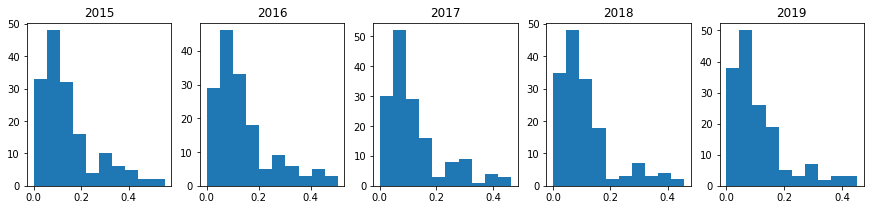

In [11]:
#Check the distribution by histogram plot
histo = {}
histo[2015] = dict_data[2015]['Trust (Government Corruption)'].tolist()
histo[2016] =dict_data[2016]['Trust (Government Corruption)'].tolist()
histo[2017] =dict_data[2017]['Trust..Government.Corruption.'].tolist()
histo[2018] =dict_data[2018]['Perceptions of corruption'].tolist()
histo[2019] =dict_data[2019]['Perceptions of corruption'].tolist()

plt.figure(figsize=(15,3))
i = 151 # subplot initial position
for year in range(2015, 2020):
    plt.subplot(i)
    plt.hist(histo[year])
    plt.title(str(year))
    i = i + 1

We can observe that distribution over the years is very similar. We assume that these features have the same information

In [12]:
#Rename the feature with Perception of corruption
dict_data[2015].rename(columns={'Trust (Government Corruption)':'Perceptions of corruption'}, inplace = True)
dict_data[2016].rename(columns={'Trust (Government Corruption)':'Perceptions of corruption'}, inplace = True)
dict_data[2017].rename(columns={'Trust..Government.Corruption.':'Perceptions of corruption'}, inplace = True)

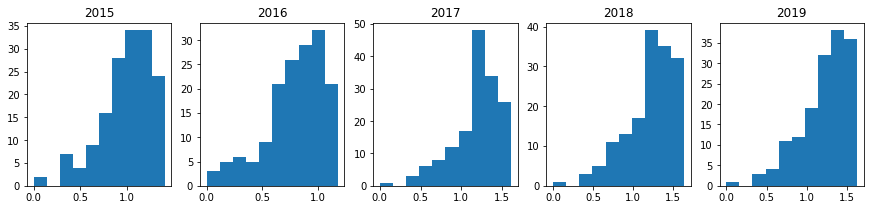

In [13]:
#Family / Social support
#Check the distribution by histogram plot
histo = {}
histo[2015] = dict_data[2015]['Family'].tolist()
histo[2016] =dict_data[2016]['Family'].tolist()
histo[2017] =dict_data[2017]['Family'].tolist()
histo[2018] =dict_data[2018]['Social support'].tolist()
histo[2019] =dict_data[2019]['Social support'].tolist()

plt.figure(figsize=(15,3))
i = 151 # subplot initial position
for year in range(2015, 2020):
    plt.subplot(i)
    plt.hist(histo[year])
    plt.title(str(year))
    i = i + 1

We can observe that distribution between 2017 and 2018 is very similar. We assume that these features have the same information

In [14]:
#Rename the feature with Social support
dict_data[2015].rename(columns={'Family':'Social support'}, inplace = True)
dict_data[2016].rename(columns={'Family':'Social support'}, inplace = True)
dict_data[2017].rename(columns={'Family':'Social support'}, inplace = True)

In [15]:
#We will use the data which countries are in all 5 sets
for year in range(2015,2020):
    data = dict_data[year]
    data = data[data['Country'].isin(inter)]
    dict_data[year] = data

In [16]:
#Because we removed some countries, we need to rerank the happiest rank
for year in range(2015, 2020):
    data = dict_data[year].sort_values(by = 'Score', ascending=False)
    data['Overall rank'] = np.arange(len(data))+1
    dict_data[year] = data

In [17]:
#We add Region information from set 2015 to set 2017 until 2019 since these sets don't have this information
data = dict_data[2015][['Country', 'Region']].copy()
for year in range(2017,2020):
    dict_data[year] = pd.merge(dict_data[year], data, on='Country', how='inner')
    print(dict_data[year].shape)

(141, 10)
(141, 10)
(141, 10)


In [18]:
#We add year column contain the year of study
for year in range(2015,2020):
    if 'Year' not in dict_data[year].columns.tolist():
        dict_data[year]['Year']=year

### Merge the Dataset

In [19]:
#Take a looks to ensure the column
df_col = pd.DataFrame()

for year in range(2015,2020):
    dict_data[year] = dict_data[year].reindex(sorted(dict_data[year].columns), axis = 1)
    df_col = pd.concat([df_col, pd.DataFrame(dict_data[year].columns.tolist(), columns = [str(year)])], axis = 1)
df_col

,2015,2016,2017,2018,2019
0,Country,Country,Country,Country,Country
1,Freedom,Freedom,Freedom,Freedom,Freedom
2,GDP per capita,GDP per capita,GDP per capita,GDP per capita,GDP per capita
3,Generosity,Generosity,Generosity,Generosity,Generosity
4,Healthy life expectancy,Healthy life expectancy,Healthy life expectancy,Healthy life expectancy,Healthy life expectancy
5,Overall rank,Overall rank,Overall rank,Overall rank,Overall rank
6,Perceptions of corruption,Perceptions of corruption,Perceptions of corruption,Perceptions of corruption,Perceptions of corruption
7,Region,Region,Region,Region,Region
8,Score,Score,Score,Score,Score
9,Social support,Social support,Social support,Social support,Social support


In [20]:
df = pd.DataFrame()

for year in range(2015,2020):
    df = pd.concat([df, dict_data[year]])
df.head(10)

,Country,Freedom,GDP per capita,Generosity,Healthy life expectancy,Overall rank,Perceptions of corruption,Region,Score,Social support,Year
0,Switzerland,0.66557,1.39651,0.29678,0.94143,1,0.41978,Western Europe,7.587,1.34951,2015
1,Iceland,0.62877,1.30232,0.43630,0.94784,2,0.14145,Western Europe,7.561,1.40223,2015
2,Denmark,0.64938,1.32548,0.34139,0.87464,3,0.48357,Western Europe,7.527,1.36058,2015
3,Norway,0.66973,1.45900,0.34699,0.88521,4,0.36503,Western Europe,7.522,1.33095,2015
4,Canada,0.63297,1.32629,0.45811,0.90563,5,0.32957,North America,7.427,1.32261,2015
5,Finland,0.64169,1.29025,0.23351,0.88911,6,0.41372,Western Europe,7.406,1.31826,2015
6,Netherlands,0.61576,1.32944,0.47610,0.89284,7,0.31814,Western Europe,7.378,1.28017,2015
7,Sweden,0.65980,1.33171,0.36262,0.91087,8,0.43844,Western Europe,7.364,1.28907,2015
8,New Zealand,0.63938,1.25018,0.47501,0.90837,9,0.42922,Australia and New Zealand,7.286,1.31967,2015
9,Australia,0.65124,1.33358,0.43562,0.93156,10,0.35637,Australia and New Zealand,7.284,1.30923,2015


# EDA

In [21]:
df.isna().sum()

Country                      0
Freedom                      0
GDP per capita               0
Generosity                   0
Healthy life expectancy      0
Overall rank                 0
Perceptions of corruption    1
Region                       0
Score                        0
Social support               0
Year                         0
dtype: int64

In [22]:
df[df['Perceptions of corruption'].isna()]

,Country,Freedom,GDP per capita,Generosity,Healthy life expectancy,Overall rank,Perceptions of corruption,Region,Score,Social support,Year
19,United Arab Emirates,0.284,2.096,0.186,0.67,20,NaN,Middle East and Northern Africa,6.774,0.776,2018


<AxesSubplot:xlabel='Perceptions of corruption'>

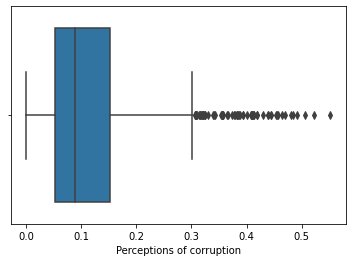

In [23]:
sns.boxplot(df['Perceptions of corruption'])

In [24]:
df['Perceptions of corruption'] = df['Perceptions of corruption'].fillna(df['Perceptions of corruption'].median())

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 705 entries, 0 to 140
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    705 non-null    object 
 1   Freedom                    705 non-null    float64
 2   GDP per capita             705 non-null    float64
 3   Generosity                 705 non-null    float64
 4   Healthy life expectancy    705 non-null    float64
 5   Overall rank               705 non-null    int32  
 6   Perceptions of corruption  705 non-null    float64
 7   Region                     705 non-null    object 
 8   Score                      705 non-null    float64
 9   Social support             705 non-null    float64
 10  Year                       705 non-null    int64  
dtypes: float64(7), int32(1), int64(1), object(2)
memory usage: 63.3+ KB


### Univariate Analysis for Numerical Features

In [26]:
#List the numerical features
df._get_numeric_data().columns.tolist()

['Freedom',
 'GDP per capita',
 'Generosity',
 'Healthy life expectancy',
 'Overall rank',
 'Perceptions of corruption',
 'Score',
 'Social support',
 'Year']

<AxesSubplot:xlabel='Year', ylabel='Score'>

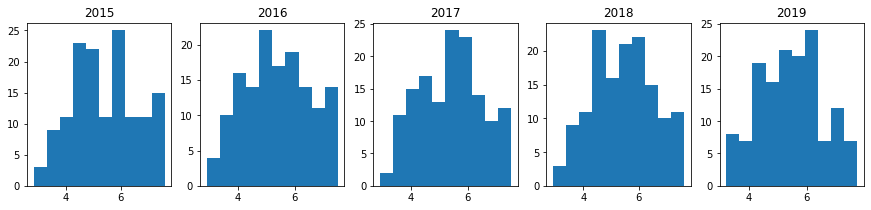

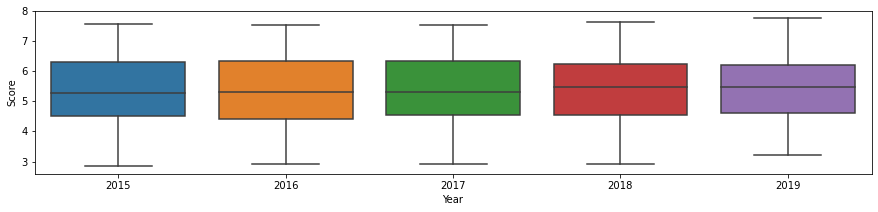

In [27]:
#The distribution of happiness score over the years using histogram
fig = plt.figure(figsize=(15,3))
i = 151
for year in range(2015,2020):
    plt.subplot(i)
    df_year = df[df['Year']==year]
    plt.hist(df_year['Score'])
    plt.title(str(year))
    i = i + 1
#The distribution of happiness score over the years using boxplot
fig2 = plt.figure(figsize=(15,3))
sns.boxplot(x = 'Year', y = 'Score', data = df)

The distribution of happiness score is similar from 2015 to 2019

<AxesSubplot:xlabel='Year', ylabel='Healthy life expectancy'>

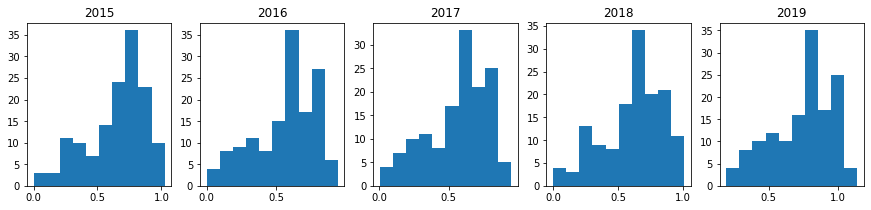

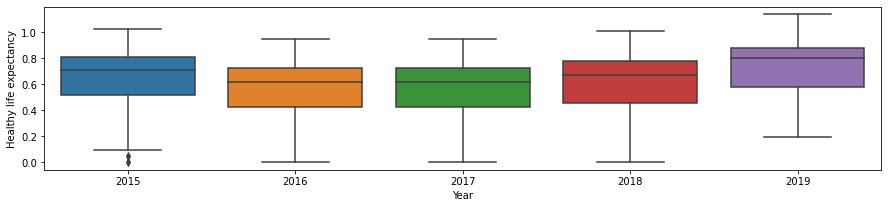

In [28]:
#The distribution of Healthy life expectancy over the years using histogram
fig = plt.figure(figsize=(15,3))
i = 151
for year in range(2015,2020):
    plt.subplot(i)
    df_year = df[df['Year']==year]
    plt.hist(df_year['Healthy life expectancy'])
    plt.title(str(year))
    i = i + 1
#The distribution of Healthy life expectancy over the years using boxplot
fig2 = plt.figure(figsize=(15,3))
sns.boxplot(x = 'Year', y = 'Healthy life expectancy', data = df)

The distribution looks like decreased from 2015 to 2017 then increased until 2019.

<AxesSubplot:xlabel='Year', ylabel='Freedom'>

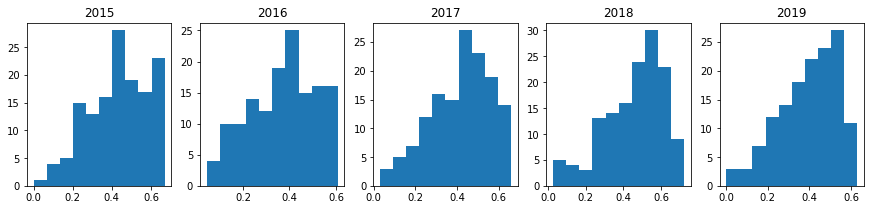

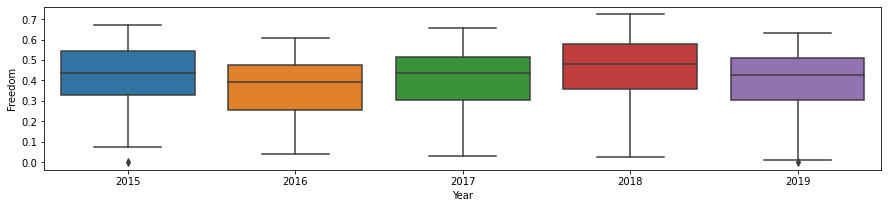

In [29]:
#The distribution of Freedom over the years using histogram
fig = plt.figure(figsize=(15,3))
i = 151
for year in range(2015,2020):
    plt.subplot(i)
    df_year = df[df['Year']==year]
    plt.hist(df_year['Freedom'])
    plt.title(str(year))
    i = i + 1
#The distribution of Freedom over the years using boxplot
fig2 = plt.figure(figsize=(15,3))
sns.boxplot(x = 'Year', y = 'Freedom', data = df)


The distribution look likes fluctuated over years.

<AxesSubplot:xlabel='Year', ylabel='GDP per capita'>

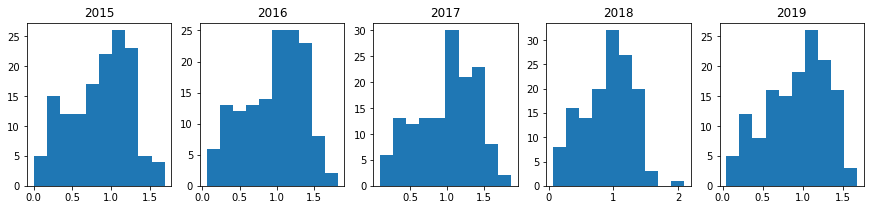

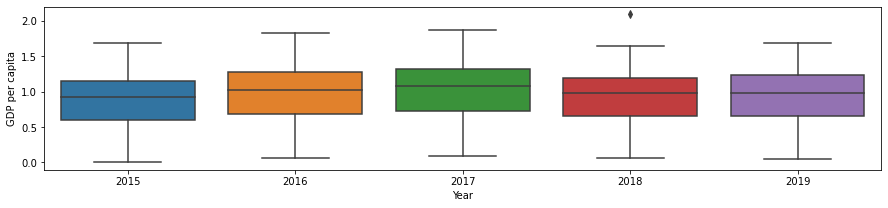

In [30]:

#The distribution of GDP per capita over the years using histogram
fig = plt.figure(figsize=(15,3))
i = 151
for year in range(2015,2020):
    plt.subplot(i)
    df_year = df[df['Year']==year]
    plt.hist(df_year['GDP per capita'])
    plt.title(str(year))
    i = i + 1
#The distribution of GDP per capita over the years using boxplot
fig2 = plt.figure(figsize=(15,3))
sns.boxplot(x = 'Year', y = 'GDP per capita', data = df)

The distribution is similar over years.

<AxesSubplot:xlabel='Year', ylabel='Generosity'>

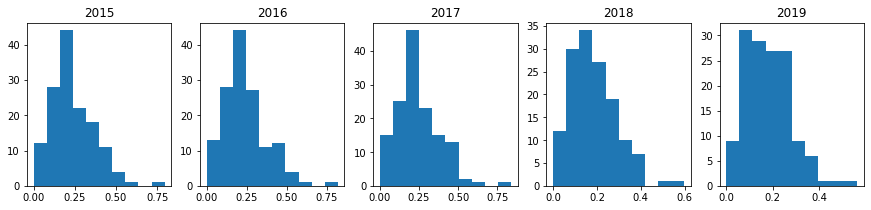

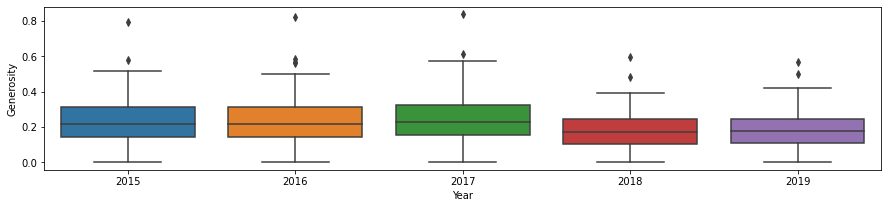

In [31]:

#The distribution of Generosity over the years using histogram
fig = plt.figure(figsize=(15,3))
i = 151
for year in range(2015,2020):
    plt.subplot(i)
    df_year = df[df['Year']==year]
    plt.hist(df_year['Generosity'])
    plt.title(str(year))
    i = i + 1
#The distribution of Generosity over the years using boxplot
fig2 = plt.figure(figsize=(15,3))
sns.boxplot(x = 'Year', y = 'Generosity', data = df)

The distribution is constantly in the same level but decreased start from 2018.

<AxesSubplot:xlabel='Year', ylabel='Perceptions of corruption'>

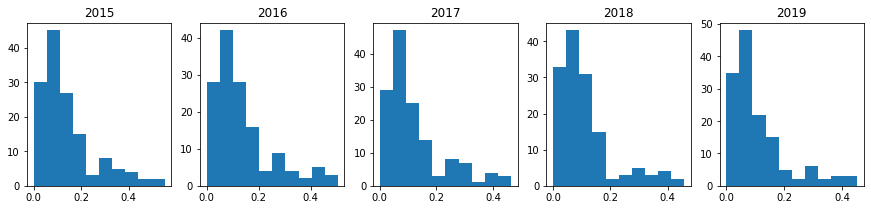

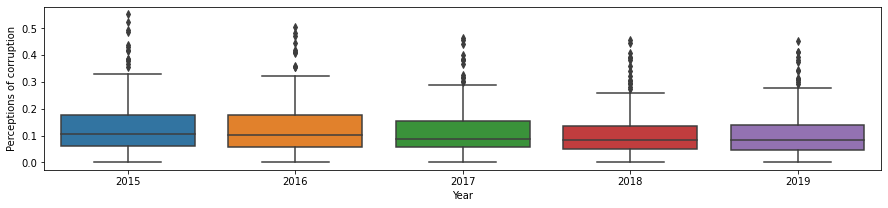

In [32]:

#The distribution of Perceptions of corruption over the years using histogram
fig = plt.figure(figsize=(15,3))
i = 151
for year in range(2015,2020):
    plt.subplot(i)
    df_year = df[df['Year']==year]
    plt.hist(df_year['Perceptions of corruption'])
    plt.title(str(year))
    i = i + 1
#The distribution of Perceptions of corruption over the years using boxplot
fig2 = plt.figure(figsize=(15,3))
sns.boxplot(x = 'Year', y = 'Perceptions of corruption', data = df)

The distribution is similar over years

<AxesSubplot:xlabel='Year', ylabel='Social support'>

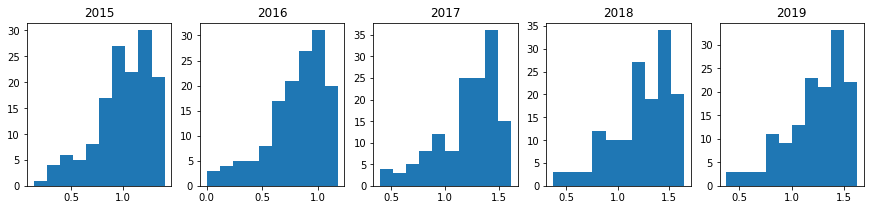

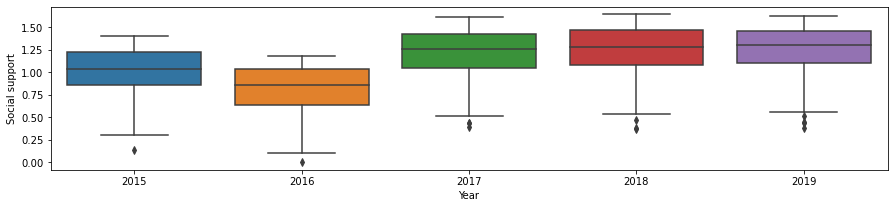

In [33]:

#The distribution of Social support over the years using histogram
fig = plt.figure(figsize=(15,3))
i = 151
for year in range(2015,2020):
    plt.subplot(i)
    df_year = df[df['Year']==year]
    plt.hist(df_year['Social support'])
    plt.title(str(year))
    i = i + 1
#The distribution of Social support over the years using boxplot
fig2 = plt.figure(figsize=(15,3))
sns.boxplot(x = 'Year', y = 'Social support', data = df)

The distribution is decreased until 2016 but then risen 1n 2017 and stay stable.

We can conclude that there is no significant differences of the distribution in all numerical features.

### Univariate Analysis for Categorical Features

In [34]:
#We only have region as the categorical features
#List all the region
df['Region'].value_counts()

Sub-Saharan Africa                 155
Central and Eastern Europe         140
Western Europe                     100
Latin America and Caribbean        100
Middle East and Northern Africa     95
Southeastern Asia                   40
Southern Asia                       35
Eastern Asia                        20
North America                       10
Australia and New Zealand           10
Name: Region, dtype: int64

<AxesSubplot:>

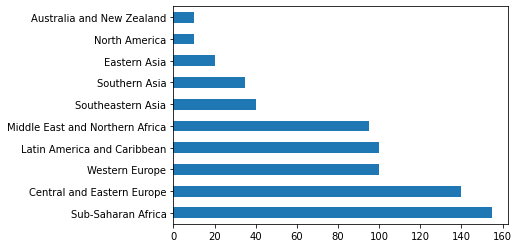

In [37]:
df['Region'].value_counts().plot(kind='barh')

We can see that the most represented the dataset for region variable is Sub-Saharan Africa

### Bivariate Analysis

<AxesSubplot:>

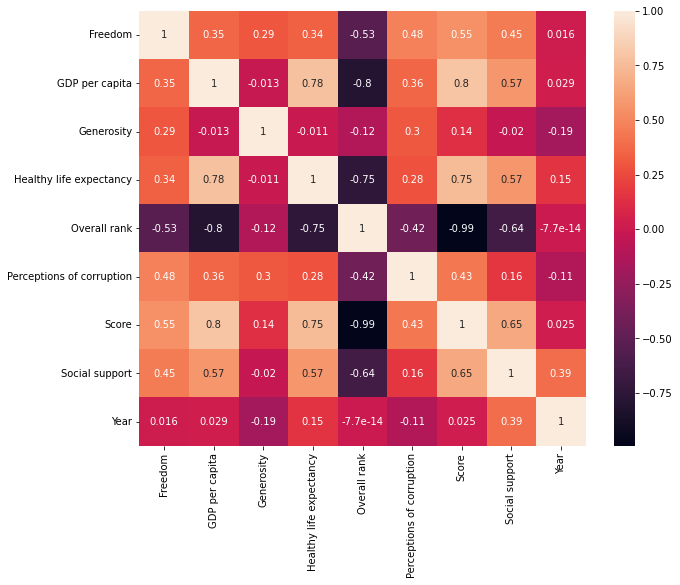

In [41]:
#Correlation between each variables
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

- GDP per capita (0.8) and Healthy life expectancy (0.75) have strong relationship with happiness score than other variables.
- Generosity (0.14) have a low/weak relationship with happiness score

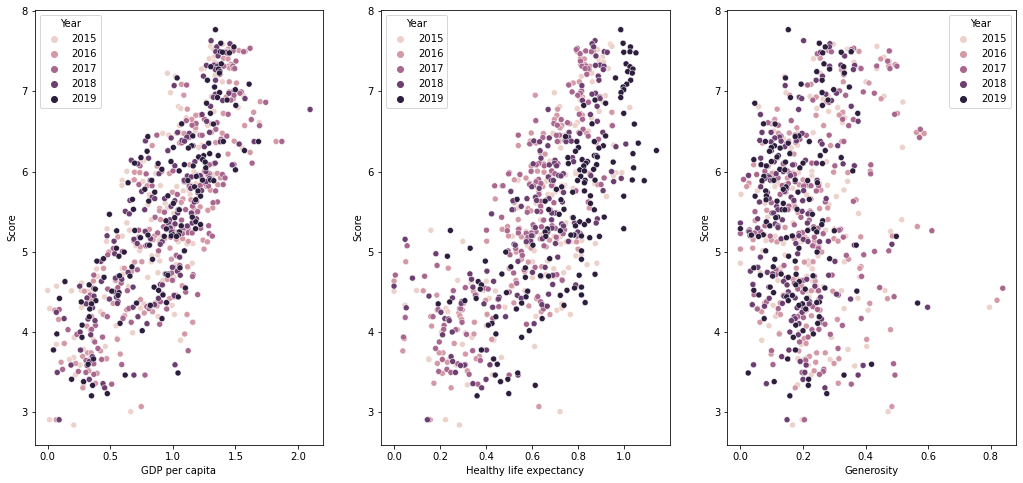

In [48]:
plt.figure(figsize=(30,8))
i = 151
for variable in ['GDP per capita', 'Healthy life expectancy', 'Generosity']:
    plt.subplot(i)
    sns.scatterplot(x = variable, y = 'Score', data = df, hue = 'Year')
    i = i + 1

We can conlude that GDP per capita and Health life expectancy have strong relationship with happiness score. From the relationship above, we can see that their relationship is linear. So, linear regression might be a goog choice to forecasting the happiness score.